# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 total observations, each observations has 4 fields, of which there are 2 observations that have no gre value, there are 2 observations that have no gpa value and and 1 observation that has no prestige value

#### Question 2. Create a summary table

In [5]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE values range from 220 and 800 while gpa values range from 2.26 and 4.00, so the std deviation would be expected to be higher for GRE since the range is so much larger

#### Question 4. Drop data points with missing data


In [6]:
df_clean = df_raw.dropna(axis=0)
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Counting the resulting dataframe shows that the counts are all the same accross all columns

#### Question 6. Create box plots for GRE and GPA

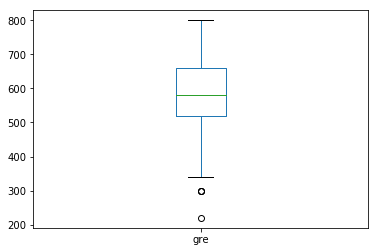

In [7]:
#boxplot 1
df_clean.gre.plot(kind='box')

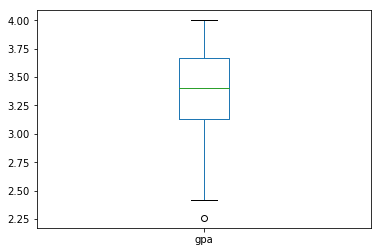

In [8]:
#boxplot 2 
df_clean.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: For GRE, 50% of the data points fall in the ~500 to ~660 point and there are 2 outlier values
For GPA , 50% of the data points fall in the ~3.12 to ~3.63 area and there is 1 outlier value

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1192c6050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1195b33d0>]], dtype=object)

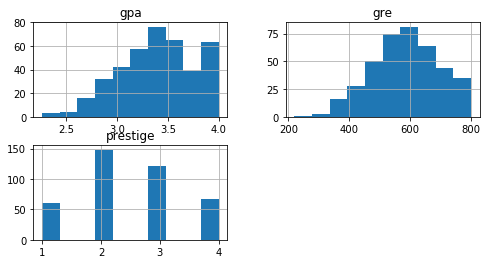

In [9]:
# plot the distribution of each variable 
df_clean[['gre', 'gpa', 'prestige']].hist(figsize = (8, 4))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [19]:
print "GPA mean: " , df_clean['gpa'].mean()
print "GPA median" , df_clean['gpa'].median()

print "GRE mean: " , df_clean['gre'].mean()
print "GRE mean: " , df_clean['gre'].median()

print "Prestige mean: " , df_clean['prestige'].mean()
print "Prestige mean: " , df_clean['prestige'].median()

GPA mean:  3.3922418136
GPA median 3.4
GRE mean:  587.858942065
GRE mean:  580.0
Prestige mean:  2.48866498741
Prestige mean:  2.0


Answer: Yes, looking at each histogram, GPA and GRE look relatively well distributed like a bell shaped curve, there are very few outliers and the mean and median of each feature are very close to each other

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Except for the outliers and empty values, Prestige and GRE do not need to be corrected as they look mostly normally distributed.  GPA could be corrected to handle the extra bias toward the 4.0 end of the distribution.  However, I'm not sure how we would actually correct the distribution

#### Question 11. Which of our variables are potentially colinear? 

In [28]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Not anything has a clear correlation, but GRE and GPA had the highest correlation with 0.32 and prestige had the highest correlation with admittance at 0.243, but not high enough to say with any certainty that there is a correlation

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Calculate admission rate for each prestige value
2. Compare admission rate for each prestige value to the overall population admission rate

3. Calculate admission rate based on prestige when population is segmented by GRE scores (i.e., 200 to 400, 400 to 600, 600 to 800) and look at admission rate for each group by prestige of school
4. Compare admission rate by prestige value of each GRE segment with overall admission rate of each segment

5. Compare admission rate based on prestige when population is segmented by GPA  (perhaps by quartiles, i.e., 1.0 to 2.0, 2.0 to 3.0, 3.0 to 4.0) and look at admission rate for each group by prestige of school
5. Compare admission rate by prestige value of each GAP segment with overall admission rate of each segment

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that the more prestigious a candidate's undergraduate school has the higher the likelihood that a candidate will be admitted.  Also, the lower the candidate's GPA or GRE, the more the prestige of their school will impact their likelihood to be admitted 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data